In [16]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Original Image')

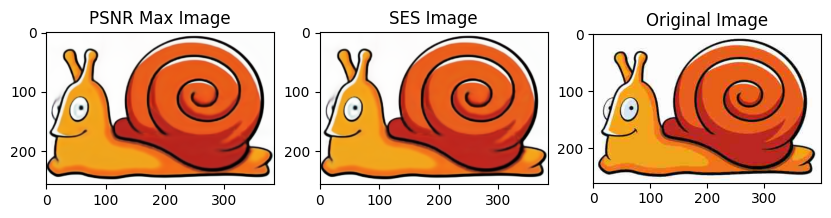

In [28]:
img_code = "snail"
original_img = plt.imread("./dataset/snail.jpg")
psnr_file_name = f"script_logpoint/PSNRMax_defended_{img_code}.npy"
ses_file_name = f"script_logpoint/SES_defended_{img_code}.npy"
psnr_data = np.load(psnr_file_name, allow_pickle=True)
ses_data = np.load(ses_file_name, allow_pickle=True)

figs, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(psnr_data.transpose(1, 2, 0))
axs[0].set_title("PSNR Max Image")
axs[1].imshow(ses_data.transpose(1, 2, 0))
axs[1].set_title("SES Image")
axs[2].imshow(original_img)
axs[2].set_title("Original Image")

Text(0.5, 1.0, 'Original Image')

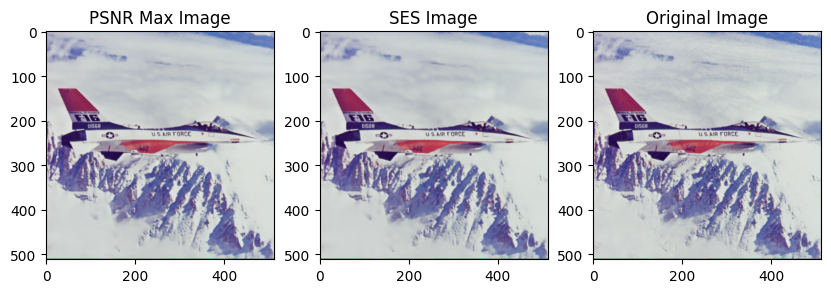

In [29]:
img_code = "F16_GT"
original_img = plt.imread("./dataset/F16_GT.png")
psnr_file_name = f"script_logpoint/PSNRMax_defended_{img_code}.npy"
ses_file_name = f"script_logpoint/SES_defended_{img_code}.npy"
psnr_data = np.load(psnr_file_name, allow_pickle=True)
ses_data = np.load(ses_file_name, allow_pickle=True)

figs, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(psnr_data.transpose(1, 2, 0))
axs[0].set_title("PSNR Max Image")
axs[1].imshow(ses_data.transpose(1, 2, 0))
axs[1].set_title("SES Image")
axs[2].imshow(original_img)
axs[2].set_title("Original Image")